C:\Users\jtomf\AppData\Local\Temp/ipykernel_22696/3312050930.py:64: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rain = data['RAIN'][:]
C:\Users\jtomf\AppData\Local\Temp/ipykernel_22696/3312050930.py:65: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  time   = data['TIME'][:]


Start time=2012-09-14T20:30:00Z
Start time=2013-09-30T08:30:00Z


FileNotFoundError: [Errno 2] No such file or directory: './plots/rain.pdf'

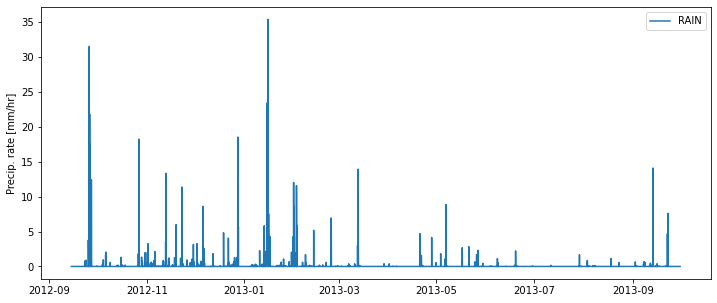

In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from scipy import signal
import datetime

#import seawater as sw

plt.close("all")
__figdir__ = "./docs/"
savefig_args = {'bbox_inches':'tight', 'pad_inches':0}

#
#  Utility functions
#
def running_average(f, N):
    """ Calculate N-point moving mean
          of the array f.

         return
            - averaged f [same size as f]
    """

    cumsum = np.cumsum(np.insert(f,0,0))
    return (cumsum[N:] - cumsum[:-N]) / N

def remove_axes(ax):
    """  Remove extra axes and hide spines
         given a figure axis ax.
    """
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

def add_second_axis(ax1,log=True):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny()
    if log:
        ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1./np.array([20,10,5,4,3,2,1])
    lp=np.array([20,10,5,4,3,2,1])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Period [s]')

#
# Main code
#

# data input
#didn't work: datapath="http://uop.whoi.edu/projects/SPURS/data/"
datapath="C:/D_drive/SPURS/spurs1_for_distribution/distributed/"
data = Dataset(datapath+"SPURS_WHOI_1_D_M1H.nc")

# filter setting
N = 20 # size of window, 20 points = 1 sec

# Instrument velocity spectrum
rain = data['RAIN'][:]
time   = data['TIME'][:]


# Time
#time   = data['time'][:]
print("Start time="+data.time_coverage_start)
time_start = datetime.datetime(2012,9,14,20,30,0,0)
print("Start time="+data.time_coverage_end)
time_end   = datetime.datetime(2013,9,30,8,30,0,0)+datetime.timedelta(minutes=60)
time2 = np.arange(time_start,time_end,datetime.timedelta(minutes=60))
#time_lp = time[N//2:-N//2+1]

#origin = np.datetime64(data.time_coverage_start)
#origin = np.datetime64('1800-01-01', 'D')
#date1 = 1744392/24 * np.timedelta64(1, 'D') + origin   # '1999-01-01'

# Filtering
#vel_n_lp = running_average(vel_n.data,N)
#vel_e_lp = running_average(vel_e.data,N)


#
# Plotting
#
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
#plt.plot(time,vel_e[N//2:-N//2+1],label='IMU vel.')
plt.plot(time2,rain,label='RAIN')
#plt.xlim(datetime.datetime(2019,4,25,12,43,0),datetime.datetime(2019,4,25,12,44,0))
#plt.ylim(-0.6,1.2)
#plt.xlabel('April 25, 2019')
plt.ylabel('Precip. rate [mm/hr]')
plt.legend()
plt.savefig(__figdir__+'rain.pdf',**savefig_args)


